### Titanic Survival Predictions

In [87]:
#Load the python libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score,mean_squared_error,r2_score, roc_auc_score,classification_report

In [66]:
# plot_confusion_matrix find soution


In [67]:
#svc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)

In [68]:
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#plt.show()

#### Columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

#### Focus: Build a model to Make survial predication from the Titanic Dataset

In [69]:
# Data cleaning function

def wrangle(file):
    
    #load file
    df = pd.read_csv(file)
   
     
    #Filling the Nan with M
    age_mean = df["Age"].mean()
    df = df.fillna(value={'Age':age_mean})
    
     #drop columns
    df.drop(columns=["Name","PassengerId","Ticket","Cabin","Embarked","Fare"],inplace=True)
    
    #change the data type of age to int
    df["Age"] = df["Age"].astype(int)
    
    
    return df

In [70]:
# Loading the training dataset

df = wrangle("train.csv")
df.info()
print('\n')
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int32 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 38.4+ KB


   Survived  Pclass     Sex  Age  SibSp  Parch
0         0       3    male   22      1      0
1         1       1  female   38      1      0
2         1       3  female   26      0      0
3         1       1  female   35      1      0
4         0       3    male   35      0      0
5         0       3    male   29      0      0
6         0       1    male   54      0      0
7         0       3    male    2      3      1
8         1       3  female   27      0      2
9         1       2  female   14      1      0


In [71]:
# getting the number of unique variables

df.nunique()

Survived     2
Pclass       3
Sex          2
Age         71
SibSp        7
Parch        7
dtype: int64

### EDA: Exploratory Data Analysis

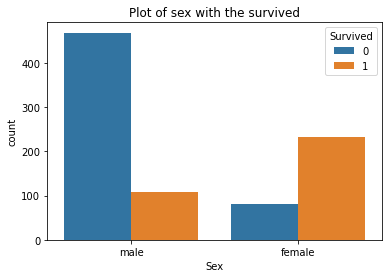

In [72]:
# Plot of sex with the survived

sns.countplot(x="Sex", data=df, hue= "Survived" )
plt.title("Plot of sex with the survived");

The plot shows that female passenger has the highest number of survival compare to male and male passenger has the highest number of non survival

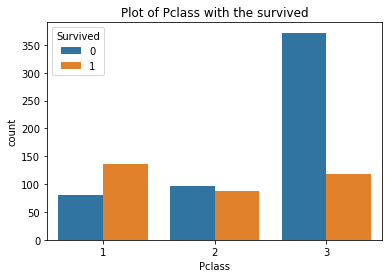

In [73]:
# Plot of Pclass with the survived

sns.countplot(x="Pclass", data=df, hue= "Survived" )
plt.title("Plot of Pclass with the survived");

The plot shows that passenger that are in pclass 1, has higher survival rate, follow by pclass 3 and pclass 2

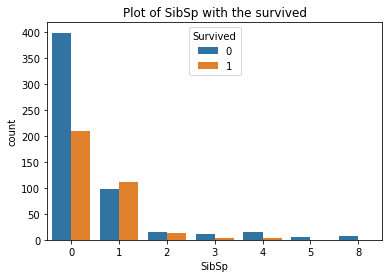

In [74]:
# Plot of SibSp with the survived

sns.countplot(x="SibSp", data=df, hue= "Survived" )
plt.title("Plot of SibSp with the survived");

 The plot shows that passenger with closer to non SibSp tend to survived compare passenger with more SibSp

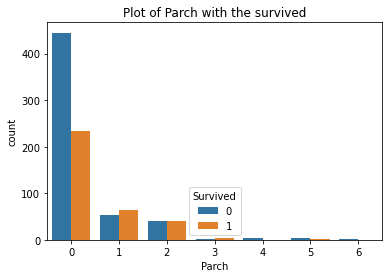

In [75]:
# Plot of Parch with the survived

sns.countplot(x="Parch", data=df, hue= "Survived")
plt.title("Plot of Parch with the survived");

The plot shows that passenger with closer to non Parch tend to survived compare passenger with more Parch

In [76]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594
std,0.486592,0.836071,13.013778,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [77]:
# we need to plot heat, so as to know the variables that are high correlated and drop them

df.select_dtypes(exclude="object").corr().style.background_gradient(cmap="coolwarm")

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.067809,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.335071,0.083081,0.018443
Age,-0.067809,-0.335071,1.000000,-0.232743,-0.176744
SibSp,-0.035322,0.083081,-0.232743,1.000000,0.414838
Parch,0.081629,0.018443,-0.176744,0.414838,1.000000


<AxesSubplot:>

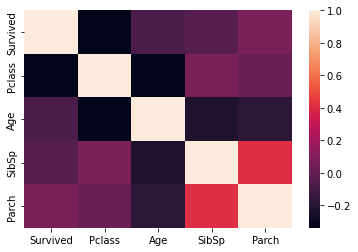

In [78]:
corr = df.select_dtypes("number").corr()

sns.heatmap(corr)

In [79]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Test/Train Split

In [88]:
# Test/Train Split

x = df.drop(["Survived"],axis=1)

y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state= 42)

In [81]:
# Iterate through the model

model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    LogisticRegression(max_iter=200)
)

model.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Sex'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [89]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

### Performance/ Evaluation Metrics

In [17]:
# Mean_squared_error

Mse = mean_squared_error(y_test, y_pred)

# r2 score
r2 = r2_score(y_test, y_pred)

# accuracy_score
accuracy = accuracy_score(y_test, y_pred)

#confusion_metrics
conf_met = confusion_matrix(y_test, y_pred)

#roc_auc_score
auc_roc = roc_auc_score(y_test, y_pred)

#classification_report
classification_report = classification_report(y_test, y_pred)

#Print all 

print("The mean squared Error is:", Mse)
print("The r2 score is:",r2)
print("The Accuracy Score:", accuracy)
print("The Confusin Metrics:", conf_met)
print("The Auc Roc:", auc_roc)
print("Classification Report:")
print(classification_report)

#get predicted probabilities
y_pred_prob = model.predict_proba(x_test)[:,1]

#roc
fpr,tpr, thresholds = roc_curve(y_test, y_pred_prob)

#plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)

# Diagonal line indicating random classification
plt.plot([0,1],[0,1], 'k--')
           
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

The mean squared Error is: 0.15555555555555556
The r2 score is: 0.35185185185185186
The Accuracy Score: 0.8444444444444444
The Confusin Metrics: [[45  9]
 [ 5 31]]
The Auc Roc: 0.8472222222222223
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87        54
           1       0.78      0.86      0.82        36

    accuracy                           0.84        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.85      0.84      0.85        90



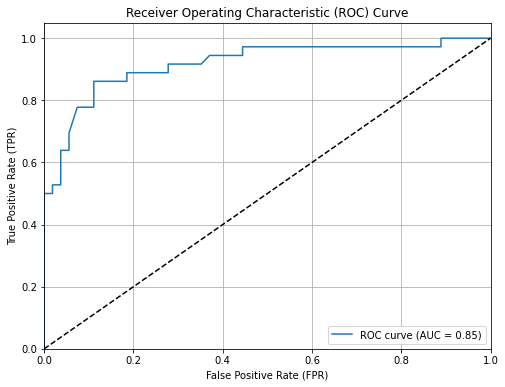

In [21]:
#get predicted probabilities
y_pred_prob = model.predict_proba(x_test)[:,1]

#roc
fpr,tpr, thresholds = roc_curve(y_test, y_pred_prob)

#plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)

# Diagonal line indicating random classification
plt.plot([0,1],[0,1], 'k--')
           
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()

From the above we can see that our model has an accuracy score of 0.844.. hence we can be confident of our model's capability.

### Prediction

In [23]:
#Load the Test data 

test_data = wrangle("test.csv")
print(test_data.info())
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pclass  418 non-null    int64 
 1   Sex     418 non-null    object
 2   Age     418 non-null    int32 
 3   SibSp   418 non-null    int64 
 4   Parch   418 non-null    int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 14.8+ KB
None


,Pclass,Sex,Age,SibSp,Parch
0,3,male,34,0,0
1,3,female,47,1,0
2,2,male,62,0,0
3,3,male,27,0,0
4,3,female,22,1,1


In [24]:
#generate predictions
predictions = model.predict(test_data)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,